# Hough Transform: Line and Circle Detection

<div style="text-align: center;">
  <a href="https://colab.research.google.com/github/MinooSdpr/Machine-Learning-101/blob/main/Session%2017/17_3%20-%20Keras%20Project%20Exercise.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" />
  </a>
  &nbsp;
  <a href="https://github.com/MinooSdpr/Machine-Learning-101/blob/main/Session%2017/17_3%20-%20Keras%20Project%20Exercise.ipynb">
    <img src="https://img.shields.io/badge/Open%20in-GitHub-24292e?logo=github&logoColor=white" alt="Open In GitHub" />
  </a>
</div>

## 🔸 Hough Line Transform

This function is used to detect **straight lines** in a binary image (usually after edge detection like Canny). It implements the **Standard Hough Line Transform**, which detects lines by transforming points in image space into a **parameter space** and finding accumulations that represent lines.

---

### ✅ Explanation of Each Parameter

| **Parameter**            | **Type**              | **Description**                                                                                              | **Example**          |
| ------------------------ | --------------------- | ------------------------------------------------------------------------------------------------------------ | -------------------- |
| `image`                  | `np.ndarray` (binary) | Input image - must be **edge-detected** (e.g., using `cv2.Canny()`) and in **grayscale**.                    | `edges`              |
| `rho`                    | `float`               | Distance resolution of the accumulator in **pixels**. Smaller values = more precision.                       | `1`                  |
| `theta`                  | `float`               | Angle resolution of the accumulator in **radians**.                                                          | `np.pi / 180` (≈ 1°) |
| `threshold`              | `int`                 | **Minimum number of votes (intersections)** in the accumulator for a line to be detected. Higher = stricter. | `100`                |
| `lines` *(optional)*     | Output array          | Storage for the output lines. If not provided, function returns the array.                                   | Usually omitted.     |
| `min_theta` *(optional)* | `float`               | Lower angle limit in radians for lines to be detected.                                                       | Default: `0`         |
| `max_theta` *(optional)* | `float`               | Upper angle limit in radians.                                                                                | Default: `np.pi`     |

---

### 📌 What is Returned?

The function returns an array of detected lines in **polar coordinates**:

```python
lines.shape  # (N, 1, 2) → N lines detected
```

Each line is represented as:

```
[rho, theta]
```

Where:

* `rho`: Distance from the origin to the line.
* `theta`: Angle of the normal vector of the line.

### 🧠 Tips

* You **must apply edge detection (e.g. Canny)** before using `cv2.HoughLines()`. Raw images won’t work.
* Too low a `threshold` = too many lines (noisy). Too high = no lines.
* For curved lines or thicker shapes, try `cv2.HoughLinesP()` (probabilistic version).

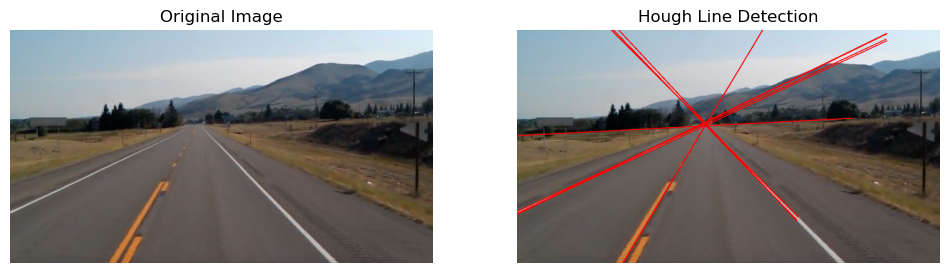

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lane.png') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 150)

lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=200)

line_img = img.copy()

if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Hough Line Detection")
plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
plt.axis("off")


## 🔸 Hough Circle Transform

This function detects **circles** in an image using the **Hough Circle Transform**. It works by detecting edges and then searching for circular patterns in the parameter space using gradients.



### ✅ Explanation of Each Parameter

| **Parameter**            | **Type**                 | **Description**                                                                                                                               | **Example**          |
| ------------------------ | ------------------------ | --------------------------------------------------------------------------------------------------------------------------------------------- | -------------------- |
| `image`                  | `np.ndarray` (grayscale) | Input image (should be grayscale). Often blurred first to reduce noise.                                                                       | `gray2`              |
| `method`                 | `int`                    | Detection method. Only `cv2.HOUGH_GRADIENT` is currently supported.                                                                           | `cv2.HOUGH_GRADIENT` |
| `dp`                     | `float`                  | Inverse ratio of the accumulator resolution to the image resolution. If `dp = 1`, the accumulator has the same resolution as the input image. | `1.2`                |
| `minDist`                | `float`                  | Minimum distance between the centers of detected circles. Prevents multiple detections of the same circle.                                    | `30`                 |
| `param1` *(optional)*    | `float`                  | First method-specific parameter: for `cv2.HOUGH_GRADIENT`, it's the higher threshold for Canny edge detector.                                 | Default: `100`       |
| `param2` *(optional)*    | `float`                  | Second method-specific parameter: accumulator threshold for circle detection. Smaller values → more false circles.                            | Default: `100`       |
| `minRadius` *(optional)* | `int`                    | Minimum circle radius to detect.                                                                                                              | Default: `0`         |
| `maxRadius` *(optional)* | `int`                    | Maximum circle radius to detect.                                                                                                              | Default: `0`         |

---

## 📌 What is Returned?

If any circles are found, `cv2.HoughCircles()` returns a NumPy array of shape `(1, N, 3)` where:

```python
circles[0][i] = (x_center, y_center, radius)
```

### 🧠 Tips

* Always **blur the input image** (e.g. with `cv2.medianBlur()`) to reduce noise before calling `cv2.HoughCircles()`.
* `param2` is **sensitive**: if it's too low, you get too many false circles; too high, and you might miss actual circles.
* Adjust `minRadius` and `maxRadius` when you know the approximate size of the circles you’re looking for.
* `dp = 1` is precise but slower; `dp > 1` reduces resolution in the accumulator space (faster but less accurate).

(-0.5, 1199.5, 1599.5, -0.5)

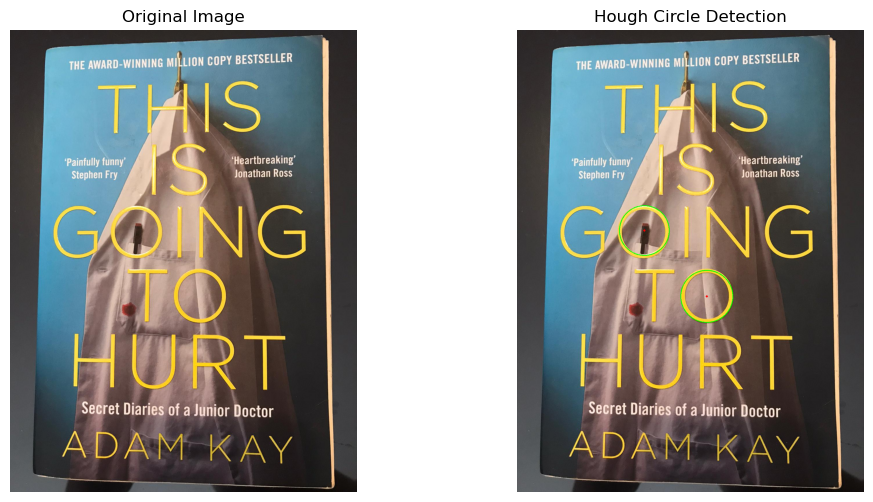

In [14]:
img2 = cv2.imread('book1.png')
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray2 = cv2.medianBlur(gray2, 5)

circles = cv2.HoughCircles(gray2, cv2.HOUGH_GRADIENT, dp=1, minDist=50,
                           param1=50, param2=80, minRadius=20, maxRadius=100)

circle_img = img2.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(circle_img, (i[0], i[1]), 2, (0, 0, 255), 3)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Hough Circle Detection")
plt.imshow(cv2.cvtColor(circle_img, cv2.COLOR_BGR2RGB))
plt.axis("off")

## Image Pyramid

### 🔹 `cv2.pyrDown(image)`
This function reduces the image resolution by a factor of 2 (both width and height). It applies a Gaussian blur before downsampling to prevent aliasing.

### 🔹 `cv2.pyrUp(image)`
This function increases the image resolution by a factor of 2. It attempts to reconstruct the original size, though the result may be slightly blurry due to interpolation.

### 📌 Key Use Cases:
- Multi-scale image analysis
- Object detection at various resolutions
- Image blending (e.g. seamless cloning)


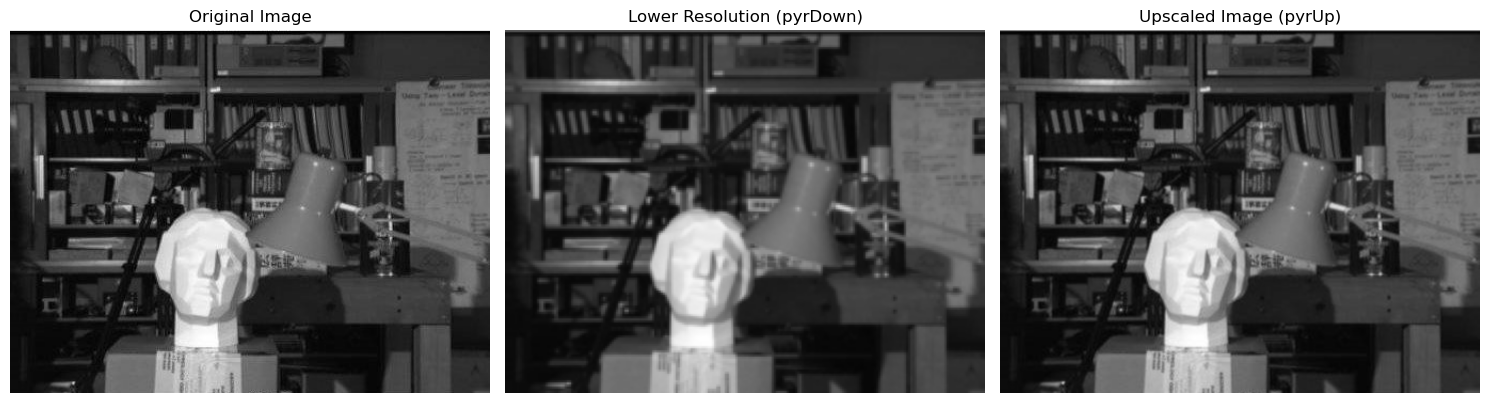

In [18]:
img = cv2.imread('statue.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

lower_reso = cv2.pyrDown(img)

higher_reso = cv2.pyrUp(img)

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Lower Resolution (pyrDown)")
plt.imshow(lower_reso)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Upscaled Image (pyrUp)")
plt.imshow(higher_reso)
plt.axis("off")

plt.tight_layout()

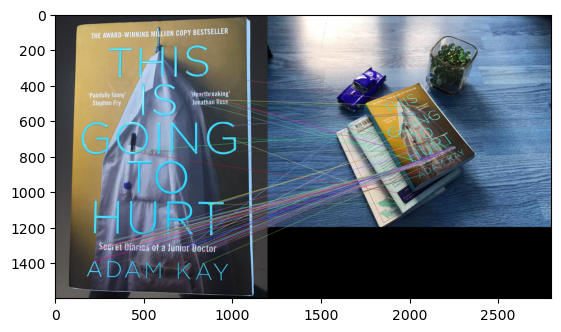

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


image1 = cv.imread("book1.png")
image2 = cv.imread("book2.png")

feat_orb = cv.ORB_create(nfeatures=1000)


orb_keypoints1, descriptors1 = feat_orb.detectAndCompute(image1, None)
orb_keypoints2, descriptors2 = feat_orb.detectAndCompute(image2, None)

bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck= True)

matches = bf.match(descriptors1, descriptors2)

matches = sorted(matches, key= lambda x:x.distance)

image_matches = cv.drawMatches(image1, orb_keypoints1, image2, orb_keypoints2, matches[:100], None, flags=2)

plt.imshow(image_matches)
plt.show()

## 🔍 What is `hog.setSVMDetector()` in Image Processing?

This is a method used with **HOG (Histogram of Oriented Gradients)** in OpenCV for **object detection**, specifically:

> `hog.setSVMDetector()` sets a **pre-trained Support Vector Machine (SVM)** model to be used with the HOG descriptor for detecting objects like **people** (pedestrians).

---

### ✅ HOG Overview (Histogram of Oriented Gradients)

* HOG is a **feature descriptor** used to detect objects based on their shape and gradient structure.
* It works by dividing an image into small connected regions (cells) and computing the histogram of gradient directions in each cell.
* It's especially effective for detecting **humans** in images.

---

### 💡 What `setSVMDetector()` Does

OpenCV's HOG implementation uses a **linear SVM** for classification.
The method `hog.setSVMDetector(detector)` assigns a **pre-trained SVM weight vector** that will be used for detection.


### 📘 1. `cv2.HOGDescriptor()`

This function creates a **HOG descriptor object** which can later be used for computing HOG features or detecting objects.

| **Parameter**       | **Type**          | **Default** | **Description**                                                  |
| ------------------- | ----------------- | ----------- | ---------------------------------------------------------------- |
| `winSize`           | `tuple(int, int)` | (64, 128)   | Size of the detection window. Standard for pedestrian detection. |
| `blockSize`         | `tuple(int, int)` | (16, 16)    | Size of the block over which gradients are normalized.           |
| `blockStride`       | `tuple(int, int)` | (8, 8)      | Step size between blocks.                                        |
| `cellSize`          | `tuple(int, int)` | (8, 8)      | Size of individual cells in a block.                             |
| `nbins`             | `int`             | 9           | Number of orientation bins per cell.                             |
| `derivAperture`     | `int`             | 1           | Aperture parameter for the Sobel operator.                       |
| `winSigma`          | `float`           | -1          | Gaussian smoothing window parameter.                             |
| `histogramNormType` | `int`             | 0           | Normalization method for histograms.                             |
| `L2HysThreshold`    | `float`           | 0.2         | Threshold for L2-Hys normalization.                              |
| `gammaCorrection`   | `bool`            | True        | Whether to apply gamma correction.                               |
| `nlevels`           | `int`             | 64          | Number of pyramid layers for detection.                          |
| `signedGradient`    | `bool`            | False       | Use signed gradients if True.                                    |

> 🔸 For most use cases, especially people detection, the default configuration is used without parameters.

---

### 📘 2. `hog.setSVMDetector(detector)`

This function sets the **SVM weights** for the HOG descriptor, which are required for object detection.

| **Parameter** | **Type**     | **Description**                                  |
| ------------- | ------------ | ------------------------------------------------ |
| `detector`    | `np.ndarray` | A 1D array of SVM weights (usually pre-trained). |



| **Function**                                   | **Description**                                                                         |
| ---------------------------------------------- | --------------------------------------------------------------------------------------- |
| `cv2.HOGDescriptor_getDefaultPeopleDetector()` | Returns a pre-trained SVM detector for pedestrian detection (trained on INRIA dataset). |

---

### 📘 3. `hog.detectMultiScale(...)`

This function runs the actual **object detection**, scanning the image at multiple scales using a sliding window.


| **Parameter**          | **Type**          | **Default / Example** | **Description**                                                                            |
| ---------------------- | ----------------- | --------------------- | ------------------------------------------------------------------------------------------ |
| `image`                | `np.ndarray`      | Required              | Input image in which to detect objects.                                                    |
| `winStride`            | `tuple(int, int)` | `(8, 8)`              | Step size of the sliding window in x and y directions. Smaller = slower but more accurate. |
| `padding`              | `tuple(int, int)` | `(8, 8)`              | Extra padding around the window. Helps detect partially visible objects.                   |
| `scale`                | `float`           | `1.05`                | Image pyramid scaling factor. Lower = more scales, more accuracy, slower.                  |
| `finalThreshold`       | `float`           | `2.0`                 | Threshold for final stage of grouping rectangles.                                          |
| `useMeanshiftGrouping` | `bool`            | `False`               | Whether to use mean shift for grouping.                                                    |

### 📤 Returns:

| **Variable** | **Type**             | **Description**                                                           |
| ------------ | -------------------- | ------------------------------------------------------------------------- |
| `rects`      | `list of rectangles` | Each rectangle represents a detected object: `(x, y, w, h)`               |
| `weights`    | `list of floats`     | Confidence scores for each detection. Higher = more likely to be correct. |


(-0.5, 799.5, 599.5, -0.5)

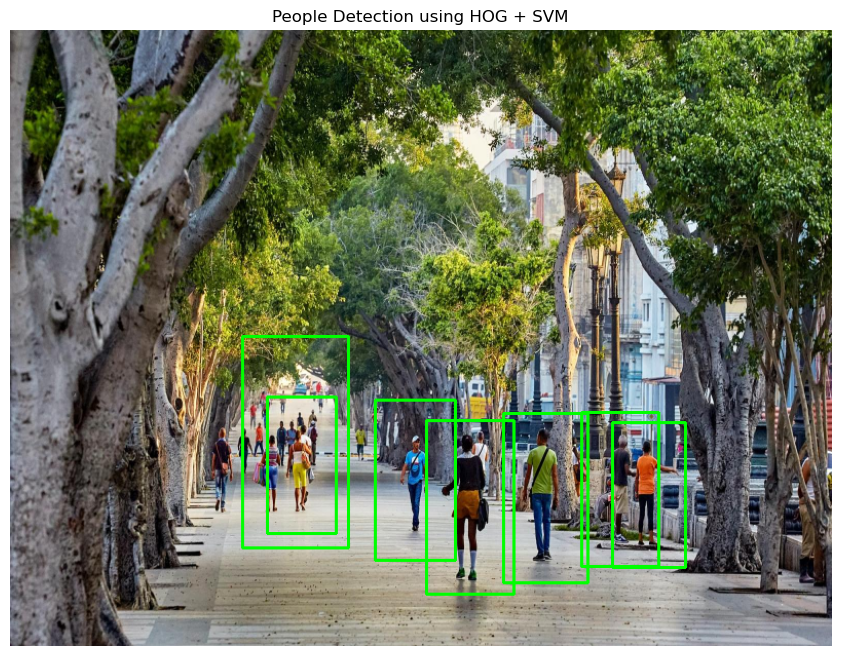

In [19]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('header-img.jpg') 
image = cv2.resize(image, (800, 600))

hog = cv2.HOGDescriptor()

hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())


(rects, weights) = hog.detectMultiScale(
    image, 
    winStride=(8, 8), 
    padding=(8, 8),    
    scale=1.05    
)

for (x, y, w, h) in rects:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.imshow(image_rgb)
plt.title("People Detection using HOG + SVM")
plt.axis("off")

## 🔍 background subtractor object

This line creates a **background subtractor object** in OpenCV using the **MOG2 (Mixture of Gaussians version 2)** algorithm. It is one of the most commonly used methods for **motion detection**, **object tracking**, and **foreground-background segmentation** in video processing.

---

## 📘 What is Background Subtraction?

Background subtraction is a technique to **separate moving objects (foreground)** from a **static or slowly changing background**.

It works by building a model of the background over time and then comparing each new frame to that model.

### 🔄 For Each Pixel:

1. The pixel's history (intensity values over time) is modeled as a **mixture of Gaussians**.
2. The **most consistent** Gaussian is considered **background**.
3. New pixels are compared to the existing distributions:

   * If a match is found → update background
   * If not → pixel is foreground
4. Optionally detects **shadows** as **gray** pixels (when `detectShadows=True`).


### 📋 Parameters:

| **Parameter**   | **Type** | **Default** | **Description**                                                                            |
| --------------- | -------- | ----------- | ------------------------------------------------------------------------------------------ |
| `history`       | `int`    | `500`       | Number of previous frames used to build the background model.                              |
| `varThreshold`  | `float`  | `16`        | Threshold for deciding whether a pixel matches a background model. Lower = more sensitive. |
| `detectShadows` | `bool`   | `True`      | Enables shadow detection (shadows appear gray in the mask).                                |

---

### 🧠 What Does `fgbg.apply(frame)` Do?

| **Function**           | **Purpose**                                                                                                                                |
| ---------------------- | ------------------------------------------------------------------------------------------------------------------------------------------ |
| `apply(frame)`         | Applies the background subtraction to the current frame. Returns a binary mask: white = moving object, black = background, gray = shadows. |
| `getBackgroundImage()` | Returns the current background model image (optional, useful for visualization).                                                           |

---

## 🖼️ Visual Output

| Color in Mask | Meaning                           |
| ------------- | --------------------------------- |
| White (255)   | Foreground (moving objects)       |
| Black (0)     | Background                        |
| Gray (127)    | Shadows (if `detectShadows=True`) |


In [ ]:
fgbg = cv2.createBackgroundSubtractorMOG2()


cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    fgmask = fgbg.apply(frame)

    cv2.imshow('Original', frame)
    cv2.imshow('Foreground Mask', fgmask)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## 🎯 Purpose of MeanShift & CamShift

Both are used for **object tracking**—to follow a moving object across video frames, especially when the object:

* Doesn’t change drastically in appearance,
* Has a distinct color distribution (histogram),
* Moves within a predictable region.

---

## 🔍 1. **MeanShift** – What Is It?

MeanShift is a **centroid-based iterative algorithm** that shifts a search window to the **densest area** (mode) of a **probability distribution**, such as color histogram backprojection.

### 📌 How It Works:

1. You define an **initial tracking window** (bounding box).
2. Create a histogram of the target inside the window (e.g., color).
3. Use **back projection** on the frame to create a probability map.
4. The algorithm iteratively shifts the window to the area of **maximum density** (i.e., where the object likely moved).
5. It stops when movement is less than a threshold (convergence).

### 🧠 Key Points:

* Tracks **position only** (not size, rotation).
* Robust and fast for real-time applications.
* Not ideal when object changes size or shape.

In [ ]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()

x, y, w, h = 200, 150, 100, 100
track_window = (x, y, w, h)

roi = frame[y:y+h, x:x+w]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
roi_hist = cv2.calcHist([hsv_roi], [0], None, [180], [0, 180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    dst = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

    ret, track_window = cv2.meanShift(dst, track_window, term_crit)

    x, y, w, h = track_window
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow('MeanShift Tracking', frame)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## 🔁 2. **CamShift (Continuously Adaptive MeanShift)**

CamShift is an **improvement over MeanShift**. It adapts to **changes in the object's size, orientation, and aspect ratio** while tracking.

### 🔧 Key Features:

* Starts with MeanShift to find object center.
* Then **updates the size and rotation** of the tracking window based on the object's distribution.
* Returns a **rotated rectangle (ellipse)** instead of a static bounding box.

### 🧠 Ideal When:

* The object changes **size** (moving toward/away from camera),
* The object **rotates** or shifts shape slightly.


### 📋 Comparison Table: MeanShift vs CamShift

| Feature             | **MeanShift**      | **CamShift**                        |
| ------------------- | ------------------ | ----------------------------------- |
| Tracks Position     | ✅                  | ✅                                   |
| Tracks Size & Scale | ❌                  | ✅                                   |
| Tracks Rotation     | ❌                  | ✅                                   |
| Output              | Rect (x, y, w, h)  | Rotated Rectangle (ellipse)         |
| Use Case            | Fixed size objects | Zooming/rotating objects            |
| Adaptability        | Static             | Dynamic                             |
| Performance         | Slightly faster    | Slightly slower (due to adaptation) |


In [ ]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()

x, y, w, h = 200, 150, 100, 100
track_window = (x, y, w, h)

roi = frame[y:y+h, x:x+w]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
roi_hist = cv2.calcHist([hsv_roi], [0], None, [180], [0, 180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    dst = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

    ret, track_window = cv2.CamShift(dst, track_window, term_crit)

    pts = cv2.boxPoints(ret)
    pts = pts.astype(int)
    cv2.polylines(frame, [pts], True, (0, 255, 0), 2)

    cv2.imshow('CamShift Tracking', frame)
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

<div style="float:right;">
  <a href="https://github.com/MinooSdpr/Machine-Learning-101/blob/main/Session%2018/01%20-%20CNN%20.pptx"
     style="
       display:inline-block;
       padding:8px 20px;
       background-color:#414f6f;
       color:white;
       border-radius:12px;
       text-decoration:none;
       font-family:sans-serif;
       transition:background-color 0.3s ease;
     ">
    ▶️ Next
  </a>
</div>